# Pneumonia Detection using X-Ray Images

### Problem Definition

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image
category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories
(Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric
patients of one to five years old from Guangzhou Women and Children’s Medical Center,
Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality
control by removing all low quality or unreadable scans. The diagnoses for the images were
then graded by two expert physicians before being cleared for training the AI system. In order to
account for any grading errors, the evaluation set was also checked by a third expert.

### Objective

Pneumonia is a very common disease. It can be either: 

1. Bacterial pneumonia 
    
2. Viral Pneumonia 
    
3. Mycoplasma pneumonia and 
    
4. Fungal pneumonia. 
    
This dataset consists pneumonia samples belonging to the first two classes. The dataset consists of only very few samples and that too unbalanced. The primary objective of this Case Study is to model an algorithm to identify whether a patient is suffering from pneumonia or not by looking at chest X-ray images

### Procedure

1. Importing the necessary libraries.

2. Clean the data and process it to make it ready for developing the model

3. Visualize the raw data and check for imbalancing

4. Balance the data with any of the machine learning approaches

5. Apply dimensionality reduction methods to reduce the size of data

6. Apply the various machine learning approaches

7. Check for the accuracy and F1 score

8. Visualize the accuracy and the F1 score for the various ML approaches.

9. Conclude which model proves to be best fit with the highest accuracy score.


### Pseudocode

1. Import the necessary libraries
2. Load the dataset
3. Split the dataset images as Normal and Pneumonia
4. Load the train, test and val images and categorize them as Normal and Pneumonia
5. Plot the data to check for imbalances
6. Use Random sampling and balance the data for the majority class
7. Apply dimensionality technique like PCA to reduce the size of the data
8. Apply Machine Learning Algorithms like Random Forest, Decision Tree Classifier, SVM and K-Nearest Neighbours
9. Fit the training data and predict the result with the test data
10. Compare the accuracies and F1 score
11. Visualize the accuracy and F1 score with plots
12. Infer the results and conclude which model shows greater and least accuracies and the best fit model.

### Importing the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io import imread
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


### Data Pre-processing

In [2]:
file_path = "chest_xray"
print(os.listdir(file_path))

['test', 'train', 'val']


In [3]:
train_Normal = Path(file_path + '/train/NORMAL').glob('*.jpeg')
train_Pneumonia = Path(file_path + '/train/PNEUMONIA').glob('*.jpeg')

In [4]:
Normal_data = [(image, 0) for image in train_Normal]
Pneumonia_data = [(image, 1) for image in train_Pneumonia]

In [5]:
train_data = Normal_data + Pneumonia_data

In [6]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'])

In [7]:
train_data.head()

,image,label
0,chest_xray\train\NORMAL\IM-0115-0001.jpeg,0
1,chest_xray\train\NORMAL\IM-0117-0001.jpeg,0
2,chest_xray\train\NORMAL\IM-0119-0001.jpeg,0
3,chest_xray\train\NORMAL\IM-0122-0001.jpeg,0
4,chest_xray\train\NORMAL\IM-0125-0001.jpeg,0


In [8]:
train_data.tail()

,image,label
5211,chest_xray\train\PNEUMONIA\person99_virus_183....,1
5212,chest_xray\train\PNEUMONIA\person9_bacteria_38...,1
5213,chest_xray\train\PNEUMONIA\person9_bacteria_39...,1
5214,chest_xray\train\PNEUMONIA\person9_bacteria_40...,1
5215,chest_xray\train\PNEUMONIA\person9_bacteria_41...,1


In [9]:
train_data = train_data.sample(frac=1., random_state=100).reset_index(drop=True)

In [10]:
train_data.head(10)

,image,label
0,chest_xray\train\PNEUMONIA\person810_bacteria_...,1
1,chest_xray\train\PNEUMONIA\person1926_bacteria...,1
2,chest_xray\train\PNEUMONIA\person395_bacteria_...,1
3,chest_xray\train\PNEUMONIA\person1455_virus_24...,1
4,chest_xray\train\PNEUMONIA\person496_virus_100...,1
5,chest_xray\train\PNEUMONIA\person553_bacteria_...,1
6,chest_xray\train\NORMAL\IM-0345-0001.jpeg,0
7,chest_xray\train\PNEUMONIA\person923_bacteria_...,1
8,chest_xray\train\PNEUMONIA\person1135_bacteria...,1
9,chest_xray\train\PNEUMONIA\person11_bacteria_4...,1


### Data Visualization

In [11]:
count_result = train_data['label'].value_counts()
print('Total : ', len(train_data))
print(count_result)

Total :  5216
1    3875
0    1341
Name: label, dtype: int64


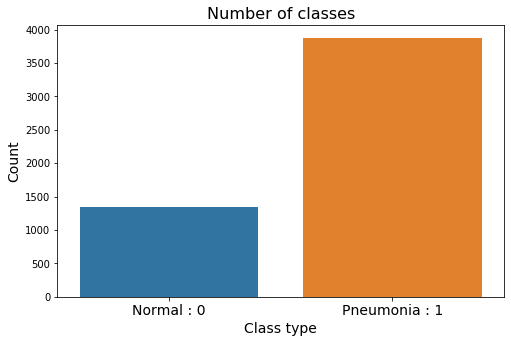

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'label', data =  train_data)
plt.title('Number of classes', fontsize=16)
plt.xlabel('Class type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(count_result.index)), 
           ['Normal : 0', 'Pneumonia : 1'], 
           fontsize=14)
plt.show()

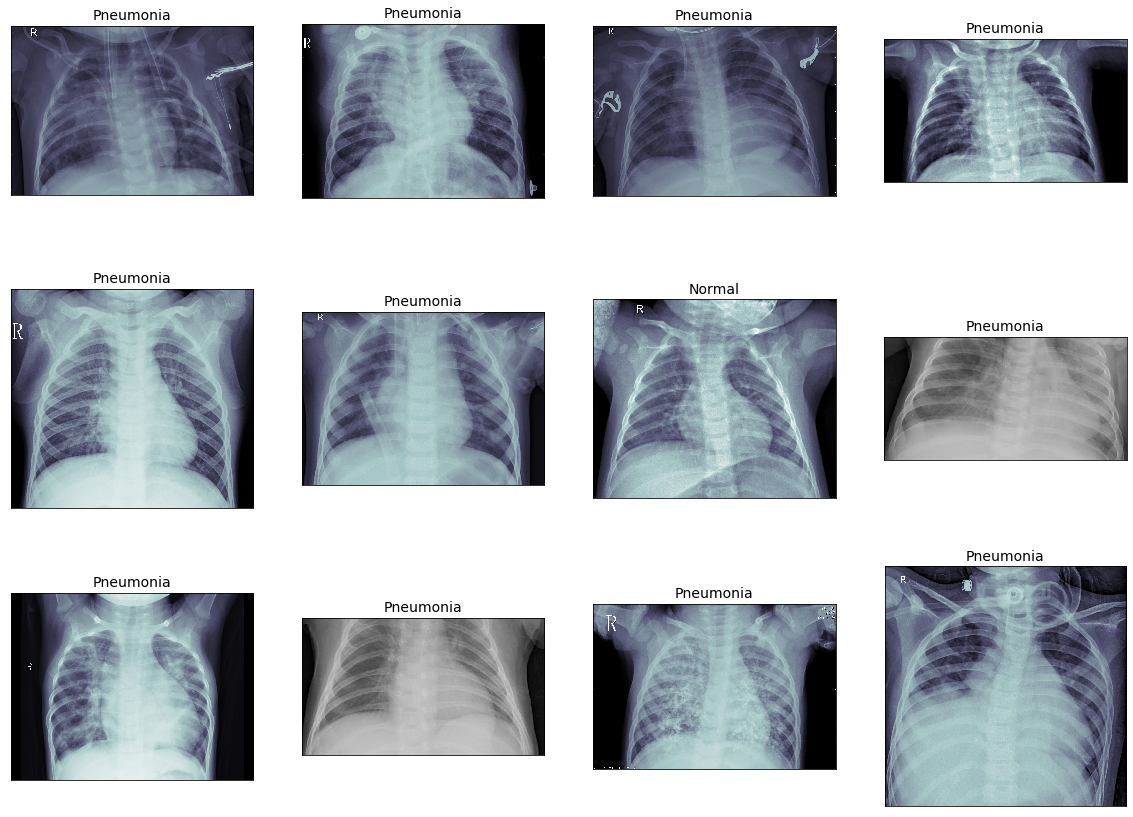

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for i, axi in enumerate(ax.flat):
    image = imread(train_data.image[i])
    axi.imshow(image, cmap='bone')
    axi.set_title('Normal' if train_data.label[i] == 0 else 'Pneumonia',
                  fontsize=14)
    axi.set(xticks=[], yticks=[])

In [14]:
def data_input(dataset):
    for image in dataset:
        im = cv2.imread(str(image))
        im = cv2.resize(im, (224,224))
        if im.shape[2] == 1:
            im = np.dstack([im, im, im])
        x_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        x_image = x_image.astype(np.float32)/255.
        return x_image

In [15]:
# list of the paths of all the image files
# Data-paths' format in (img_path, label) 
# labels : for [ Normal cases = 0 ] & [ Pneumonia cases = 1 ]
# Importing both image & label datasets...
# Convert the list into numpy arrays

def load_data(files_dir='/train'):   
    normal = Path(file_path + files_dir + '/NORMAL').glob('*.jpeg')
    pneumonia = Path(file_path + files_dir + '/PNEUMONIA').glob('*.jpeg')
   
    normal_data = [(image, 0) for image in normal]
    pneumonia_data = [(image, 1) for image in pneumonia]

    image_data = normal_data + pneumonia_data
    image_data = pd.DataFrame(image_data, columns=['image', 'label'])    
    image_data = image_data.sample(frac=1., random_state=100).reset_index(drop=True)    
    
    x_images, y_labels = ([data_input(image_data.iloc[i][:]) for i in range(len(image_data))], 
                         [image_data.iloc[i][1] for i in range(len(image_data))])

    x_images = np.array(x_images)
    x_images = x_images.reshape(x_images.shape[0],x_images.shape[1]*x_images.shape[2]*x_images.shape[3])
    y_labels = np.array(y_labels)
    
    print("Total number of images: ", x_images.shape)
    print("Total number of labels: ", y_labels.shape)
    
    return x_images, y_labels

In [16]:
x_train, y_train = load_data(files_dir='/train')
print(x_train.shape)
print(y_train.shape)

Total number of images:  (5216, 150528)
Total number of labels:  (5216,)
(5216, 150528)
(5216,)


In [17]:
x_test, y_test = load_data(files_dir='/test')
print(x_test.shape)
print(y_test.shape)

Total number of images:  (624, 150528)
Total number of labels:  (624,)
(624, 150528)
(624,)


In [18]:
x_val, y_val = load_data(files_dir='/val')
print(x_val.shape)
print(y_val.shape)

Total number of images:  (16, 150528)
Total number of labels:  (16,)
(16, 150528)
(16,)


### Balancing the dataset with Random Under-sampling

In [19]:
ros = RandomUnderSampler()
X_trainRos, Y_trainRos = ros.fit_sample(x_train, y_train)
X_testRos, Y_testRos = ros.fit_sample(x_test, y_test)

In [20]:
print(X_trainRos.shape)
print(Y_trainRos.shape)

(2682, 150528)
(2682,)


In [21]:
print(X_testRos.shape)
print(Y_testRos.shape)

(468, 150528)
(468,)


### Standardizing the Data

In [22]:
sc = StandardScaler()
X_trainRos = sc.fit_transform(X_trainRos)
X_testRos = sc.transform(X_testRos)

### PCA

In [23]:
pca = PCA(.95)
x_train_pca = pca.fit_transform(X_trainRos)

In [24]:
x_test_pca = pca.transform(X_testRos)
explained_variane = pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

In [25]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(2682, 629)
(468, 629)


In [26]:
dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']

Count = labRos.value_counts()
print('Total : ', len(labRos))
print(Count)

Total :  2682
1    1341
0    1341
Name: labels, dtype: int64


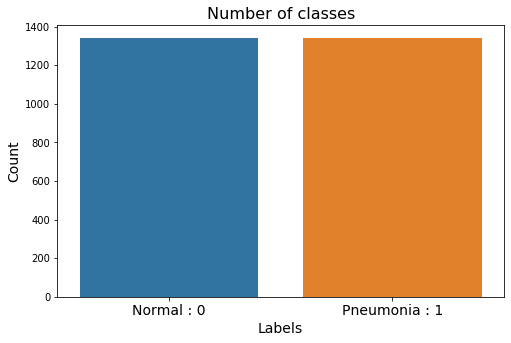

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'labels', data =  dfRos)
plt.title('Number of classes', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(Count.index)), 
           ['Normal : 0', 'Pneumonia : 1'], 
           fontsize=14)
plt.show()

### Random Forest

In [52]:
model_RF = RandomForestClassifier(n_estimators=1000)
model_RF.fit(x_train_pca, Y_trainRos)

RandomForestClassifier(n_estimators=1000)

In [53]:
ypred = model_RF.predict(x_test_pca)

In [54]:
acc_score_RF = accuracy_score(Y_testRos, np.round(ypred))*100
conf_mat_RF = confusion_matrix(Y_testRos, np.round(ypred))
tn, fp, fn, tp = conf_mat_RF.ravel()

In [55]:
print('CONFUSION MATRIX ------------------')
print(conf_mat_RF)

CONFUSION MATRIX ------------------
[[144  90]
 [ 14 220]]


In [56]:
print('\nTEST METRICS ----------------------')
precision_RF = tp/(tp+fp)*100
recall_RF = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc_score_RF))
print('Precision: {}%'.format(precision_RF))
print('Recall: {}%'.format(recall_RF))
print('F1-score: {}'.format(2*precision_RF*recall_RF/(precision_RF+recall_RF)))


TEST METRICS ----------------------
Accuracy: 77.77777777777779%
Precision: 70.96774193548387%
Recall: 94.01709401709401%
F1-score: 80.88235294117646


In [57]:
print(metrics.classification_report(ypred, Y_testRos))

              precision    recall  f1-score   support

           0       0.62      0.91      0.73       158
           1       0.94      0.71      0.81       310

    accuracy                           0.78       468
   macro avg       0.78      0.81      0.77       468
weighted avg       0.83      0.78      0.78       468



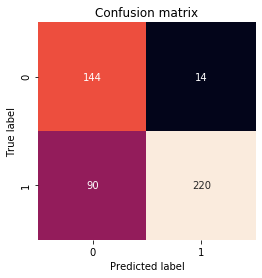

In [58]:
ax = sns.heatmap(conf_mat_RF.T, annot=True, square=True, fmt='d', cbar=False)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)   
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label');


In [118]:
dfAcc = pd.DataFrame({"Labels":['Random Forest'],"Accuracy":[format(np.round(acc_score_RF))]})
dfAcc

,Labels,Accuracy
0,Random Forest,78.0


In [119]:
F1_score_RF = format(2*precision_RF*recall_RF/(precision_RF+recall_RF))
format(F1_score_RF)

'80.88235294117646'

In [120]:
dfF1 = pd.DataFrame({"Labels":['Random Forest'],"F1 Score":[format(F1_score_RF)]})
dfF1

,Labels,F1 Score
0,Random Forest,80.88235294117646


### SVM

In [149]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [150]:
#pca = PCA(n_components=625, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

In [151]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1, 5, 10, 50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [152]:
grid.fit(x_train_pca, Y_trainRos)
print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 0.0001}


In [153]:
model =grid.best_estimator_
yfit=model.predict(x_test_pca)

In [154]:
print(metrics.classification_report(Y_testRos,yfit))
#dfAcc.loc[len(dfAcc.index)] = ['SVC',format(np.round(acc_score_SVC))] 

              precision    recall  f1-score   support

           0       0.98      0.41      0.58       234
           1       0.63      0.99      0.77       234

    accuracy                           0.70       468
   macro avg       0.80      0.70      0.67       468
weighted avg       0.80      0.70      0.67       468



In [155]:
acc_score_SVC = accuracy_score(Y_testRos, np.round(yfit))*100
conf_mat_SVC = confusion_matrix(Y_testRos, np.round(yfit))

In [156]:
mat = confusion_matrix(Y_testRos,yfit)

In [157]:
tn, fp, fn, tp = conf_mat_SVC.ravel()

In [158]:
print('CONFUSION MATRIX ------------------')
print(conf_mat_SVC)

CONFUSION MATRIX ------------------
[[ 96 138]
 [  2 232]]


In [159]:
print('\nTEST METRICS ----------------------')
precision_SVC = tp/(tp+fp)*100
recall_SVC = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc_score_SVC))
print('Precision: {}%'.format(precision_SVC))
print('Recall: {}%'.format(recall_SVC))
print('F1-score: {}'.format(2*precision_SVC*recall_SVC/(precision_SVC+recall_SVC)))


TEST METRICS ----------------------
Accuracy: 70.08547008547008%
Precision: 62.70270270270271%
Recall: 99.14529914529915%
F1-score: 76.82119205298015


Text(0.5, 1, 'Accuracy Score: 70.08547008547008')

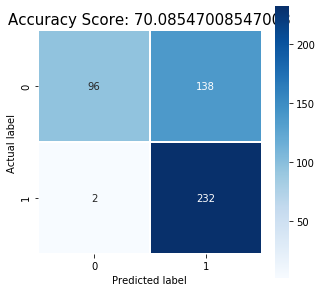

In [160]:
plt.figure(figsize=(5,5))
axm = sns.heatmap(data=conf_mat_SVC,fmt='d',linewidths=.5, annot=True,square = True,  cmap = 'Blues')
bottom, top = axm.get_ylim() 
axm.set_ylim(bottom + 0.5, top - 0.5)   
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(acc_score_SVC)
plt.title(all_sample_title, size = 15)

In [121]:
dfAcc.loc[len(dfAcc.index)] = ['SVC',format(np.round(acc_score_SVC))] 
F1_score_SVC = format(2*precision_SVC*recall_SVC/(precision_SVC+recall_SVC))
dfF1.loc[len(dfF1.index)] = ['SVC',format(2*precision_SVC*recall_SVC/(precision_SVC+recall_SVC))]

In [122]:
dfAcc

,Labels,Accuracy
0,Random Forest,78.0
1,SVC,70.0


In [123]:
dfF1

,Labels,F1 Score
0,Random Forest,80.88235294117646
1,SVC,76.82119205298015


### KNN

In [161]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca,Y_trainRos)

KNeighborsClassifier(n_neighbors=1)

In [162]:
Pred_KNN = knn.predict(x_test_pca)

In [163]:
Conf_Mat_KNN=confusion_matrix(Y_testRos,Pred_KNN)

Text(33.0, 0.5, 'Predicted Label')

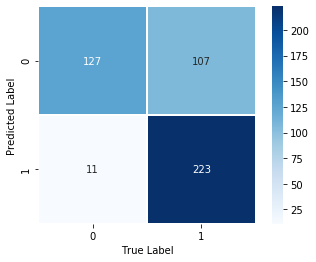

In [164]:
axmKNN = sns.heatmap(data=Conf_Mat_KNN,fmt='d',linewidths=.5, annot=True,square = True,  cmap = 'Blues')
bottom, top = axmKNN.get_ylim() 
axmKNN.set_ylim(bottom + 0.5, top - 0.5) 
plt.xlabel('True Label') 
plt.ylabel('Predicted Label')

In [165]:
print("Classification report - \n", metrics.classification_report(Y_testRos,Pred_KNN))

Classification report - 
               precision    recall  f1-score   support

           0       0.92      0.54      0.68       234
           1       0.68      0.95      0.79       234

    accuracy                           0.75       468
   macro avg       0.80      0.75      0.74       468
weighted avg       0.80      0.75      0.74       468



In [166]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_pca,Y_trainRos)
    pred_i = knn.predict(x_test_pca)
    Misclassified_sample.append((Y_testRos != pred_i).sum())

print(Misclassified_sample)

[118, 98, 120, 104, 128, 112, 122, 110, 122, 114, 117, 111, 118, 113, 120, 111, 118, 110, 116]


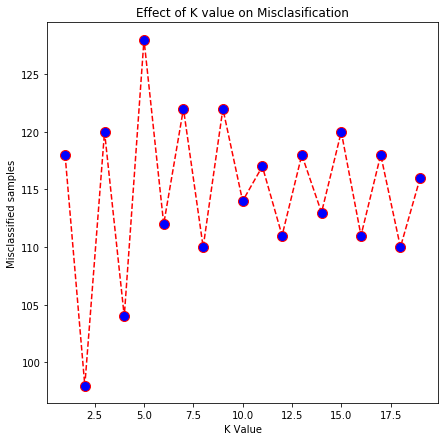

In [167]:
# Plotting the effect of K 
plt.figure(figsize = (7,7))
plt.plot(range(1,20,1),Misclassified_sample, marker='o',
         color='red',linestyle='dashed',   
         markerfacecolor='blue', markersize=10)

plt.title('Effect of K value on Misclasification')  
plt.xlabel('K Value')  
plt.ylabel('Misclassified samples')  
plt.show()

In [168]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,Y_trainRos)
Pred_KNN = knn.predict(x_test_pca)

In [169]:
print("Classification report - \n", metrics.classification_report(Y_testRos,Pred_KNN))
acc_score_KNN = accuracy_score(Y_testRos, np.round(Pred_KNN))*100
conf_mat_KNN = confusion_matrix(Y_testRos, Pred_KNN)

Classification report - 
               precision    recall  f1-score   support

           0       0.95      0.52      0.67       234
           1       0.67      0.97      0.79       234

    accuracy                           0.74       468
   macro avg       0.81      0.74      0.73       468
weighted avg       0.81      0.74      0.73       468



In [170]:
print('CONFUSION MATRIX ------------------')
print(conf_mat_KNN)
print('Accuracy: {}%'.format(acc_score_KNN))

CONFUSION MATRIX ------------------
[[121 113]
 [  7 227]]
Accuracy: 74.35897435897436%


In [171]:
tn, fp, fn, tp = conf_mat_KNN.ravel()
print('\nTEST METRICS ----------------------')
precision_KNN = tp/(tp+fp)*tn
recall_KNN = tp/(tp+fn)*100

print('Accuracy: {}%'.format(acc_score_KNN))
print('Precision: {}%'.format(precision_KNN))
print('Recall: {}%'.format(recall_KNN))
print('F1-score: {}'.format(2*precision_KNN*recall_KNN/(precision_KNN+recall_KNN)))


TEST METRICS ----------------------
Accuracy: 74.35897435897436%
Precision: 80.78529411764706%
Recall: 97.00854700854701%
F1-score: 88.15675450139615


In [172]:
dfAcc.loc[len(dfAcc.index)] = ['KNN',format(np.round(acc_score_KNN))] 
dfF1.loc[len(dfF1.index)] = ['KNN',format(2*precision_KNN*recall_KNN/(precision_KNN+recall_KNN))]

dfF1

,Labels,F1 Score
0,Random Forest,80.88235294117646
1,SVC,76.82119205298015
2,KNN,88.15675450139615


### Decision Trees

In [175]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train_pca,Y_trainRos)

In [176]:
pred_dt=dt.predict(x_test_pca)

In [177]:
acc_score_DT = accuracy_score(Y_testRos, np.round(pred_dt))*100
conf_mat_DT = confusion_matrix(Y_testRos, pred_dt)
print("Classification report - \n", metrics.classification_report(Y_testRos,pred_dt))

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.61      0.68       234
           1       0.68      0.82      0.75       234

    accuracy                           0.72       468
   macro avg       0.73      0.72      0.71       468
weighted avg       0.73      0.72      0.71       468



In [178]:
print('CONFUSION MATRIX ------------------')
print(conf_mat_DT)
print('Accuracy: {}%'.format(acc_score_DT))

CONFUSION MATRIX ------------------
[[143  91]
 [ 41 193]]
Accuracy: 71.7948717948718%


In [179]:
tn, fp, fn, tp = conf_mat_DT.ravel()
print('\nTEST METRICS ----------------------')
precision_DT = tp/(tp+fp)*tn
recall_DT = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc_score_DT))
print('Precision: {}%'.format(precision_DT))
print('Recall: {}%'.format(recall_DT))
print('F1-score: {}'.format(2*precision_DT*recall_KNN/(precision_DT+recall_DT)))


TEST METRICS ----------------------
Accuracy: 71.7948717948718%
Precision: 97.17957746478874%
Recall: 82.47863247863248%
F1-score: 104.94649380880024


Text(0.5, 1, 'Accuracy Score: 71.7948717948718')

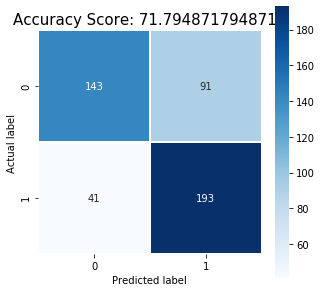

In [180]:
plt.figure(figsize=(5,5))
axm = sns.heatmap(data=conf_mat_DT,fmt='d',linewidths=.5, annot=True,square = True,  cmap = 'Blues')
bottom, top = axm.get_ylim() 
axm.set_ylim(bottom + 0.5, top - 0.5)   
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(acc_score_DT)
plt.title(all_sample_title, size = 15)

[Text(281.14329484902305, 428.48470588235296, 'X[1] <= 52.143\ngini = 0.5\nsamples = 2682\nvalue = [1341, 1341]'),
 Text(150.37753108348133, 415.6941176470588, 'X[2] <= -69.756\ngini = 0.427\nsamples = 1808\nvalue = [1250, 558]'),
 Text(53.91687388987566, 402.9035294117647, 'X[6] <= -0.788\ngini = 0.475\nsamples = 492\nvalue = [191, 301]'),
 Text(22.993960923623444, 390.1129411764706, 'X[7] <= 18.141\ngini = 0.457\nsamples = 229\nvalue = [148, 81]'),
 Text(9.514742451154529, 377.32235294117646, 'X[18] <= -29.113\ngini = 0.27\nsamples = 137\nvalue = [115, 22]'),
 Text(6.343161634103019, 364.5317647058823, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(12.686323268206039, 364.5317647058823, 'X[8] <= -36.886\ngini = 0.214\nsamples = 131\nvalue = [115, 16]'),
 Text(6.343161634103019, 351.74117647058824, 'X[590] <= 0.709\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(3.1715808170515096, 338.9505882352941, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(9.514742451154529, 338.9505

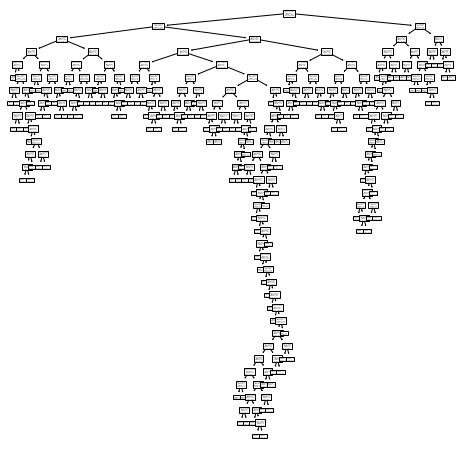

In [181]:
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(dt) 

In [182]:
dfAcc.loc[len(dfAcc.index)] = ['Decision Tree', format(np.round(acc_score_DT))] 
dfF1.loc[len(dfF1.index)] = ['Decision Tree', format(2*precision_DT*recall_DT/(precision_DT+recall_DT))] 
dfF1

,Labels,F1 Score
0,Random Forest,80.88235294117646
1,SVC,76.82119205298015
2,KNN,88.15675450139615
3,Decision Tree,89.2276357052795


### Best Fit Model

In [183]:
dfAcc

,Labels,Accuracy
0,Random Forest,78.0
1,SVC,70.0
2,KNN,74.0
3,Decision Tree,72.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
Labels      4 non-null object
Accuracy    4 non-null object
dtypes: object(2)
memory usage: 96.0+ bytes


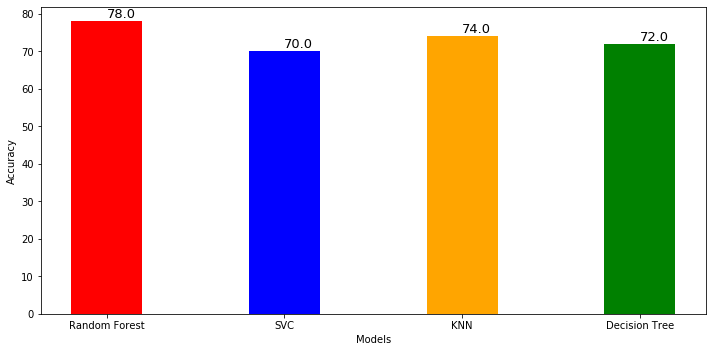

In [184]:
dfAcc.info()
dfAcc["Accuracy"] = dfAcc["Accuracy"].astype(str).astype(float)

fig, ax = plt.subplots(figsize = (10,5))
width = 0.4
ind = np.arange(len(dfAcc["Accuracy"]))
  
ax.bar(dfAcc["Labels"],dfAcc["Accuracy"],width,color=['red','blue','orange','green']);
plt.xlabel('Models')  
plt.ylabel('Accuracy')                 

for index, value in enumerate(dfAcc["Accuracy"]):
    plt.text(x=index , y =value+1 , s=f"{value}" , fontdict=dict(fontsize=13))
plt.tight_layout()
  
plt.show()

In [185]:
dfF1

,Labels,F1 Score
0,Random Forest,80.88235294117646
1,SVC,76.82119205298015
2,KNN,88.15675450139615
3,Decision Tree,89.2276357052795


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
Labels      4 non-null object
F1 Score    4 non-null object
dtypes: object(2)
memory usage: 96.0+ bytes


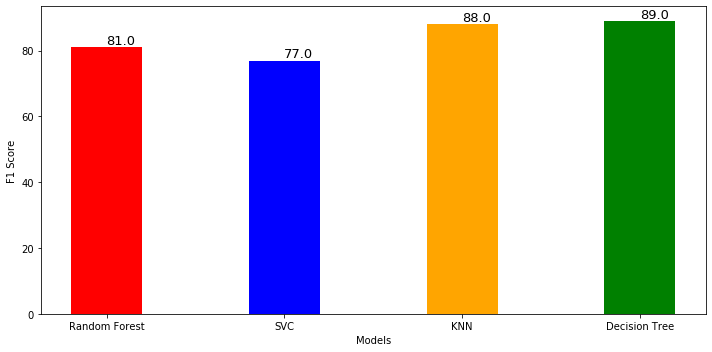

In [186]:
dfF1.info()
dfF1["F1 Score"] = dfF1["F1 Score"].astype(str).astype(float)

fig, ax = plt.subplots(figsize = (10,5))
width = 0.4
ind = np.arange(len(dfF1["F1 Score"]))
  
ax.bar(dfF1["Labels"],np.round(dfF1["F1 Score"]),width,color=['red','blue','orange','green']);
plt.xlabel('Models')  
plt.ylabel('F1 Score')                 

for index, value in enumerate(np.round(dfF1["F1 Score"])):
    plt.text(x=index , y =value+1 , s=f"{value}" , fontdict=dict(fontsize=13))
plt.tight_layout()
  
plt.show()

### Conclusion

The above results show the accuracy of Pneumonia detection with Chest X-ray images. It can be seen that allm achine-learning models, except the decision tree have shown good accuracy. The highest accuracy was 98.46% which was shown by Random Forest . On the other hand, the decision tree classifier achieved the lowest performanceof 85.64%.

The average F- score of theclassiﬁer is all-more than 90%, which is all an excellent result. In all the results of the f-score, the accuracy of Random Forest (RF) is approximately 98.95%, which is the largest compared to other classiﬁers.